In [10]:
# El simbolo '!' sirve para correr comandos de bash en jupyter notebook.
# El simbolo '%' te permite hacer uso de la terminal dentro del jupyer notebook.
!curl -L -o /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/mobile_dataset.zip \
  https://www.kaggle.com/api/v1/datasets/download/valakhorasani/mobile-device-usage-and-user-behavior-dataset
# Cambiar comando -> ! curl -L -o {pwd}/data/{dataset}.zip/{enlace}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 11576    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (56) Failure writing output to destination, passed 1177 returned 4294967295


In [2]:
!pwd

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [3]:
#P.D.
t = %pwd
print(t)

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [4]:
%ls

data/        draft.ipynb


In [5]:
%ls data

df_clasificacion.csv       mobile_dataset.zip
df_regresion.csv           user_behavior_dataset.csv


In [6]:
%%time
%cd /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/ 
# -> %cd {pwd}/data
!unzip -o mobile_dataset.zip
%cd ..

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data
Archive:  mobile_dataset.zip
  inflating: user_behavior_dataset.csv  
/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos
CPU times: user 2.12 ms, sys: 4.77 ms, total: 6.89 ms
Wall time: 127 ms


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('data/user_behavior_dataset.csv')

In [9]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
#Estado de los datos.
print(df.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


Comentario: no es necesario ninguna imputacion en los datos de origen pues no existen datos nulos en el conjunto de datos o información.

In [12]:
# AED - breve.
print(df.info())
print(df.describe())
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.0

Comentario: Acerca de la seleccion del modelo visto que este es un borrador del proyecto para practicar las habilidades expuestas en la tematica de la rubrica. Mi acercamiento es hacer ambos tipos de modelo (regresión y clasifación). Afortunadamente este conjunto de datos se adapta a ambos tipos de problema por el concepto que utiliza. 

+ Regresión: Intentaremos predecir 'App Usage Time (min/day)'
+ Clasificación: Intentaremos clasificar los comportamientos de los usuarios basados en las caracteristicas brindadas (para esto debemos de 'drop'ear la columna 'User Behavior Class' y hacer la nuestra).

In [14]:
df.drop('User Behavior Class', axis=1, inplace=True)

In [15]:
df.drop('User ID', axis=1, inplace=True)

In [16]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [17]:
# Preparación(preprocesamiento) y observación de los datos.

In [18]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender'],
      dtype='object')

In [19]:
variables_categoricas = df.columns[df.dtypes == 'object'].tolist()
print(variables_categoricas)

['Device Model', 'Operating System', 'Gender']


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
categoricas_encoded = encoder.fit_transform(df[variables_categoricas])
nuevas_columnas = encoder.get_feature_names_out(variables_categoricas)
df_encoded = pd.DataFrame(categoricas_encoded.toarray(), columns=nuevas_columnas, index=df.index)

In [21]:
df_encoded.columns

Index(['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
       'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
       'Operating System_iOS', 'Gender_Male'],
      dtype='object')

In [22]:
df = pd.concat([df.select_dtypes(exclude=['object']), df_encoded], axis=1)

In [23]:
df.columns

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Device Model_OnePlus 9',
       'Device Model_Samsung Galaxy S21', 'Device Model_Xiaomi Mi 11',
       'Device Model_iPhone 12', 'Operating System_iOS', 'Gender_Male'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   App Usage Time (min/day)         700 non-null    int64  
 1   Screen On Time (hours/day)       700 non-null    float64
 2   Battery Drain (mAh/day)          700 non-null    int64  
 3   Number of Apps Installed         700 non-null    int64  
 4   Data Usage (MB/day)              700 non-null    int64  
 5   Age                              700 non-null    int64  
 6   Device Model_OnePlus 9           700 non-null    float64
 7   Device Model_Samsung Galaxy S21  700 non-null    float64
 8   Device Model_Xiaomi Mi 11        700 non-null    float64
 9   Device Model_iPhone 12           700 non-null    float64
 10  Operating System_iOS             700 non-null    float64
 11  Gender_Male                      700 non-null    float64
dtypes: float64(7), int64(5

In [25]:
continuas = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
            'Battery Drain (mAh/day)', 'Number of Apps Installed', 
            'Data Usage (MB/day)', 'Age']

binarias = ['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
            'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
            'Operating System_iOS', 'Gender_Male']

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

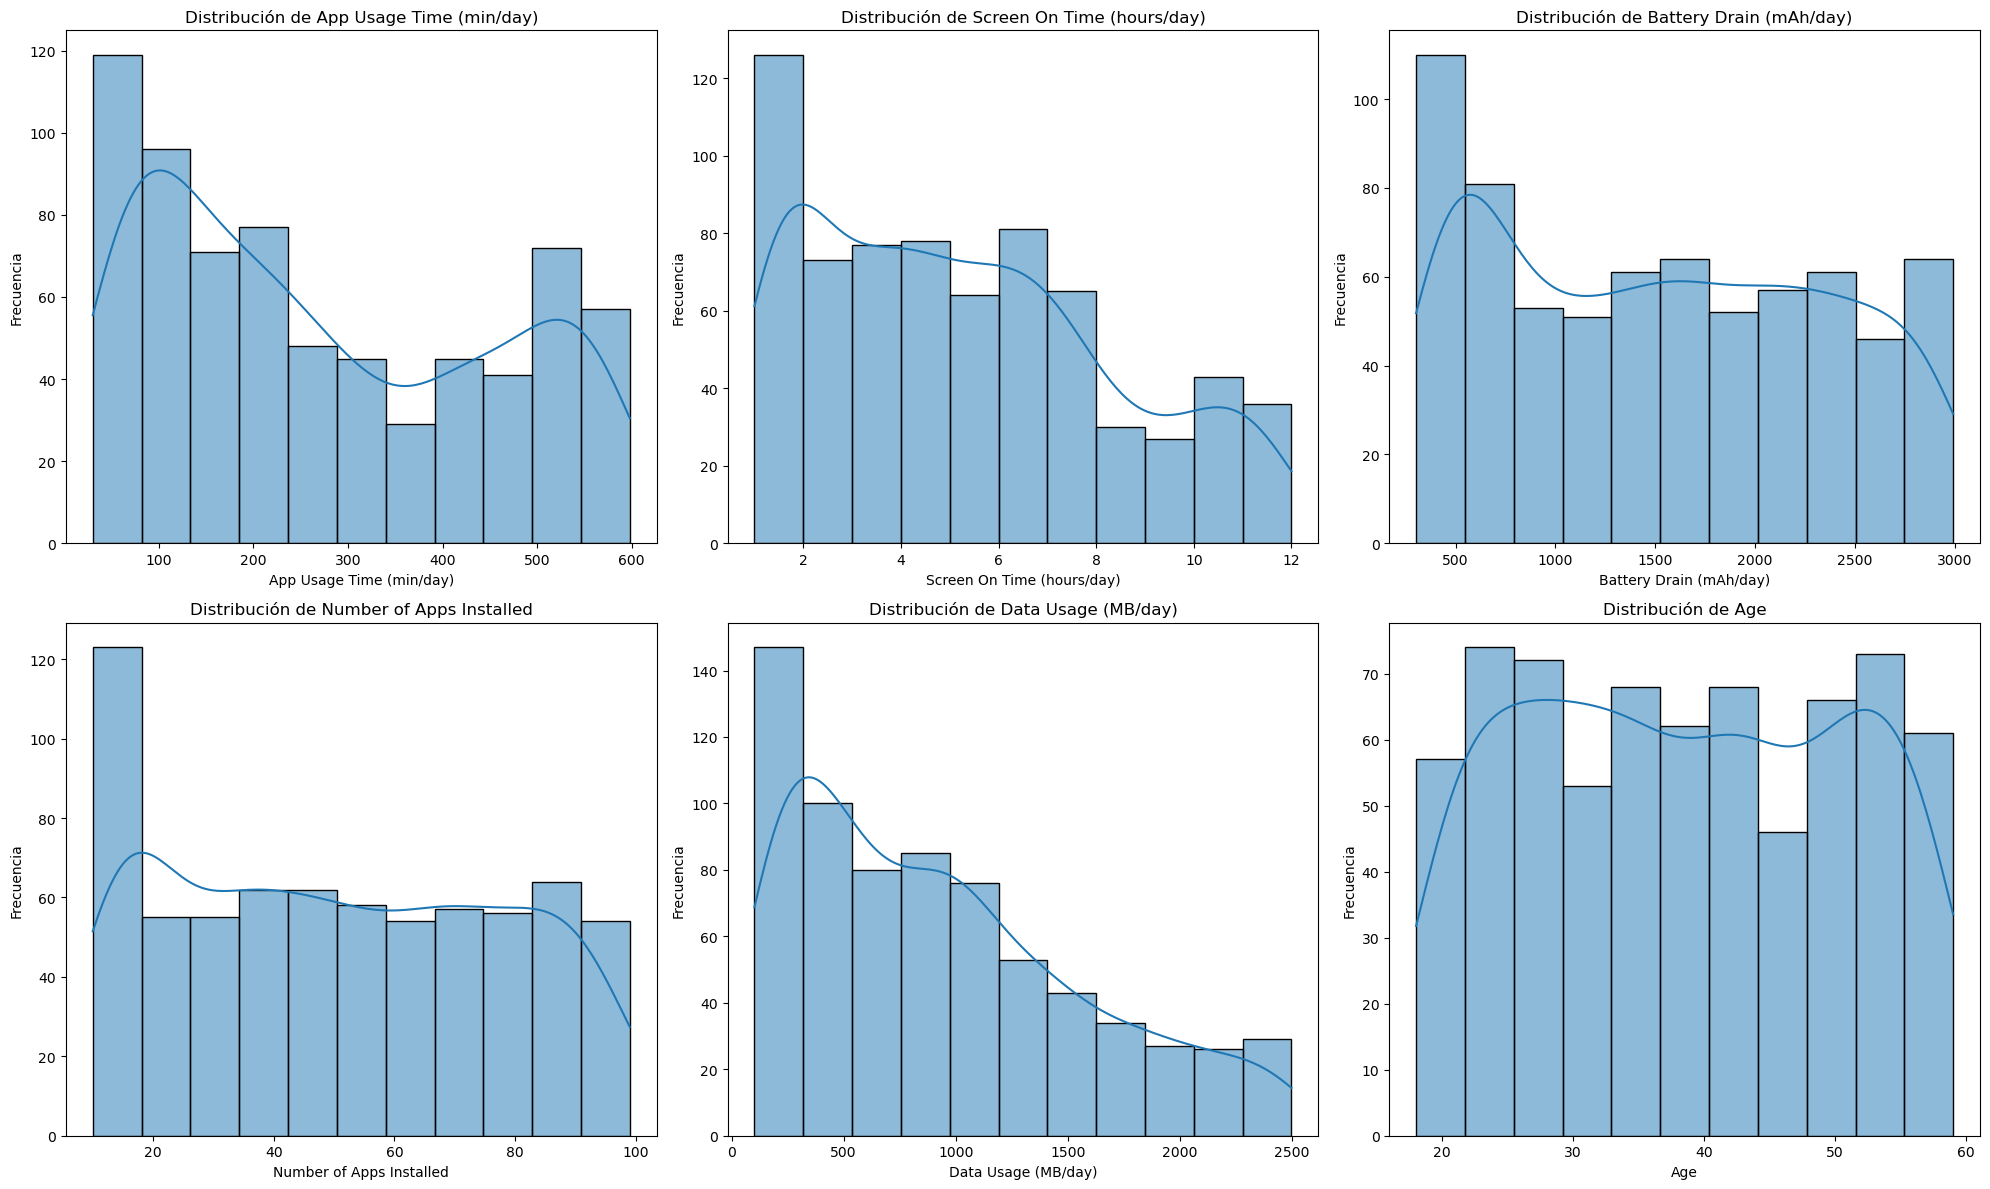

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, var in enumerate(continuas):
    sns.histplot(data=df, x=var, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

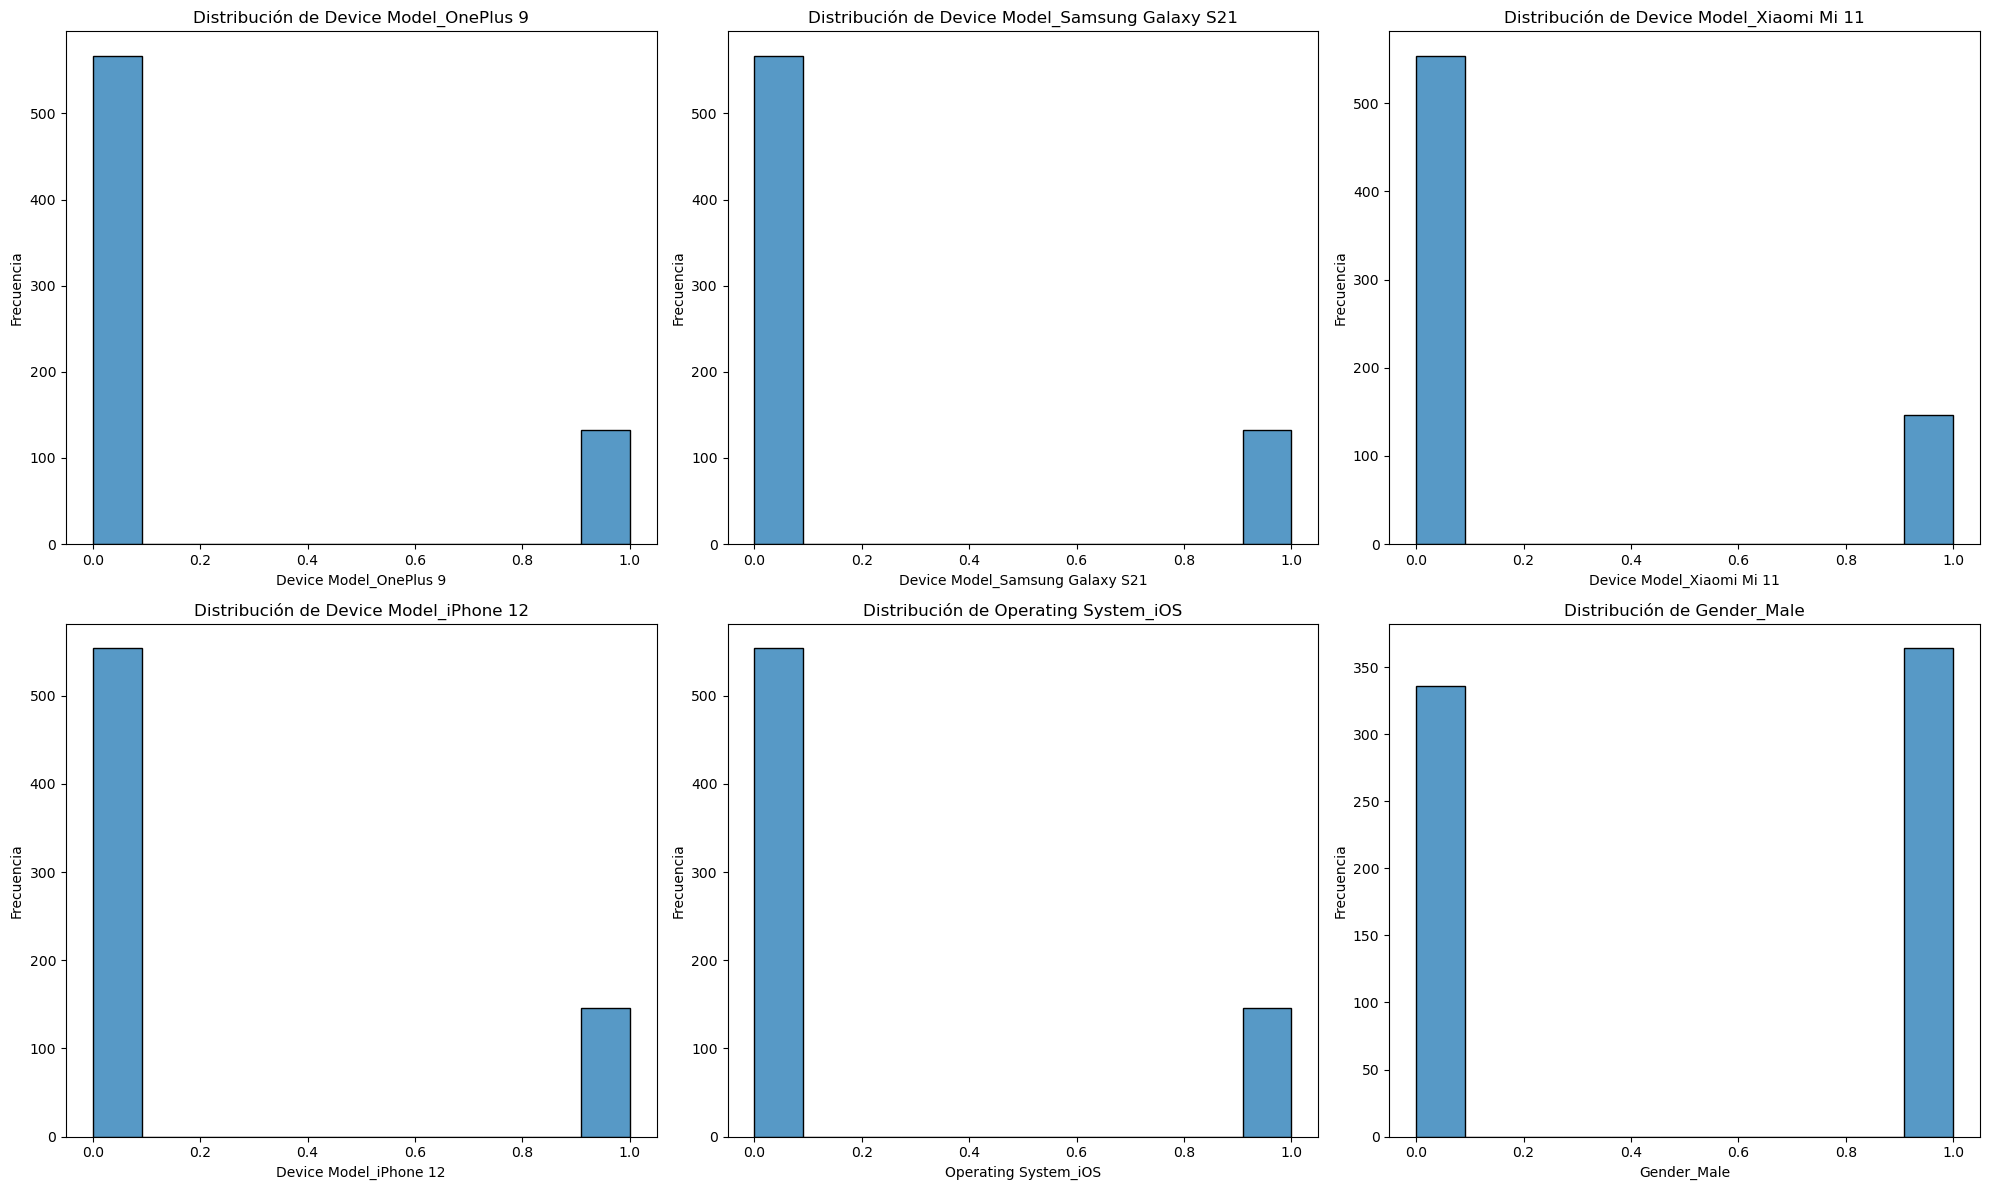

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, var in enumerate(binarias):
    sns.histplot(data=df, x=var, kde=False, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [29]:
variables_predictoras = ['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 
            'Data Usage (MB/day)', 'Age','Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
            'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
            'Operating System_iOS', 'Gender_Male']

variable_objetivo = 'App Usage Time (min/day)'

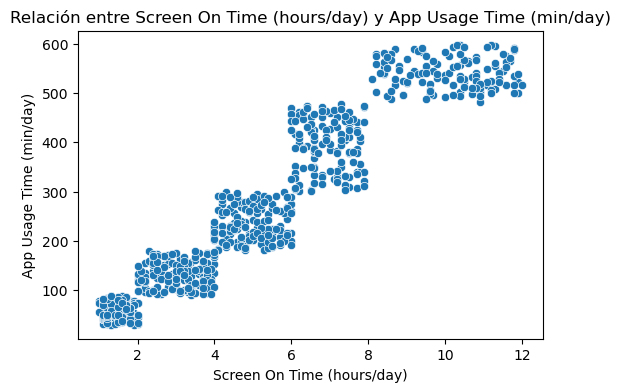

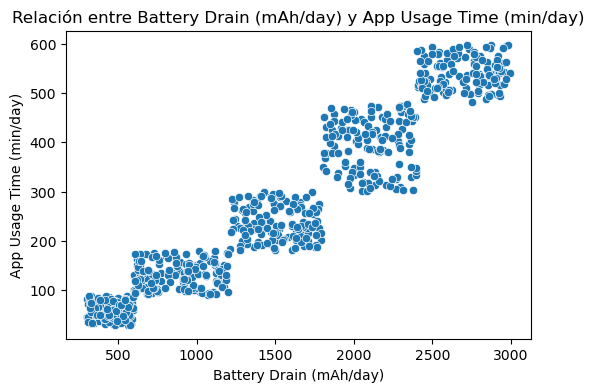

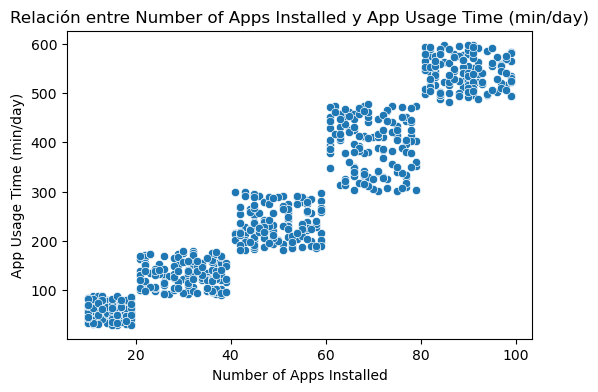

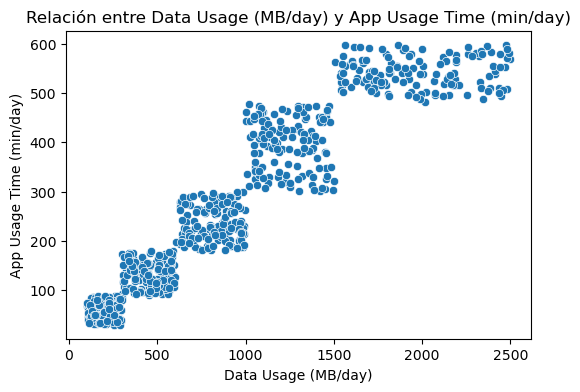

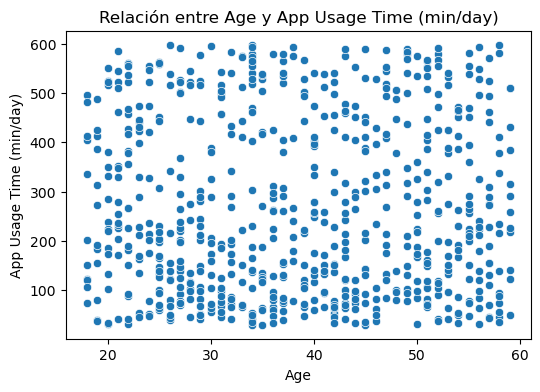

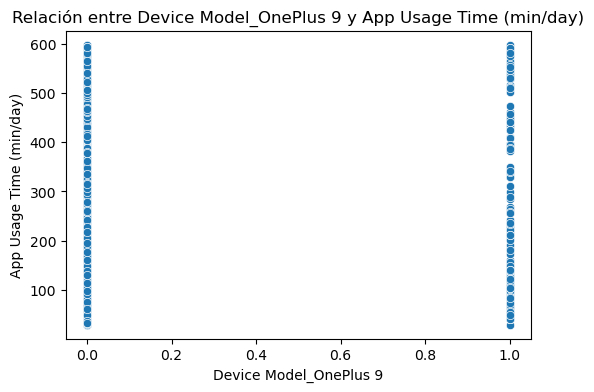

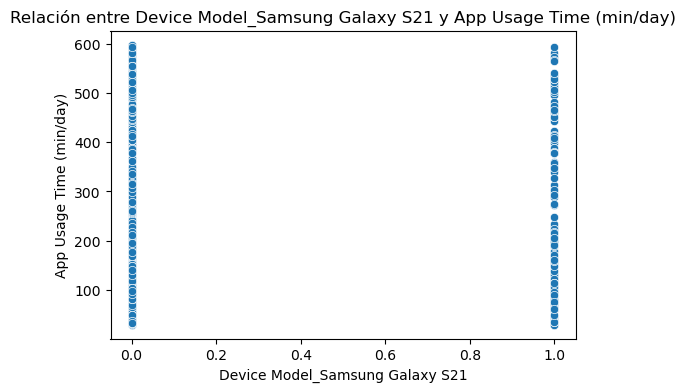

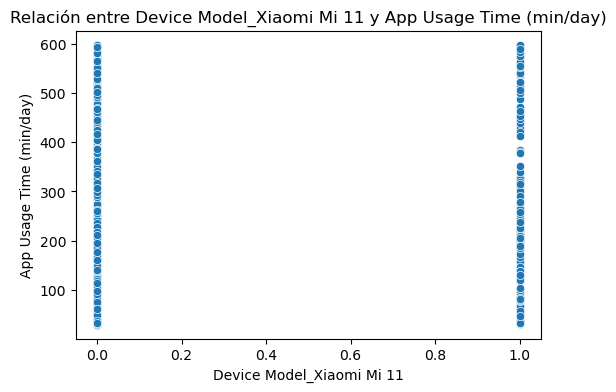

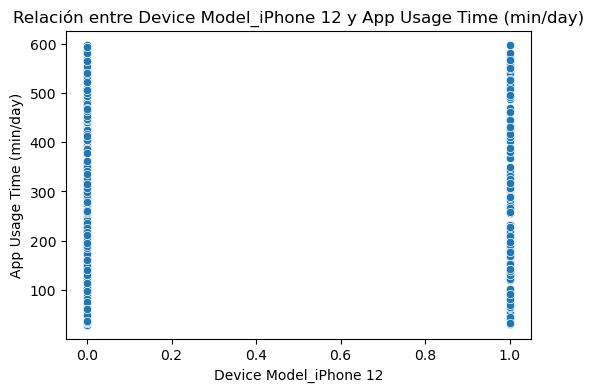

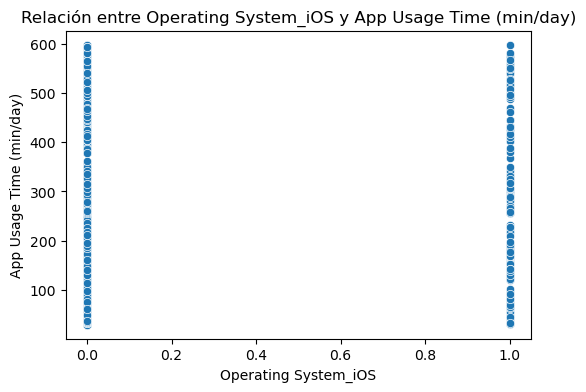

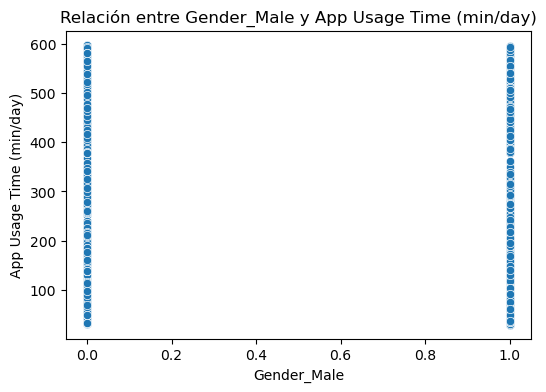

In [30]:
for predictor in variables_predictoras:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=predictor, y=variable_objetivo)
    plt.title(f'Relación entre {predictor} y {variable_objetivo}')
    plt.show()

In [31]:
correlation_matrix = df.corr()

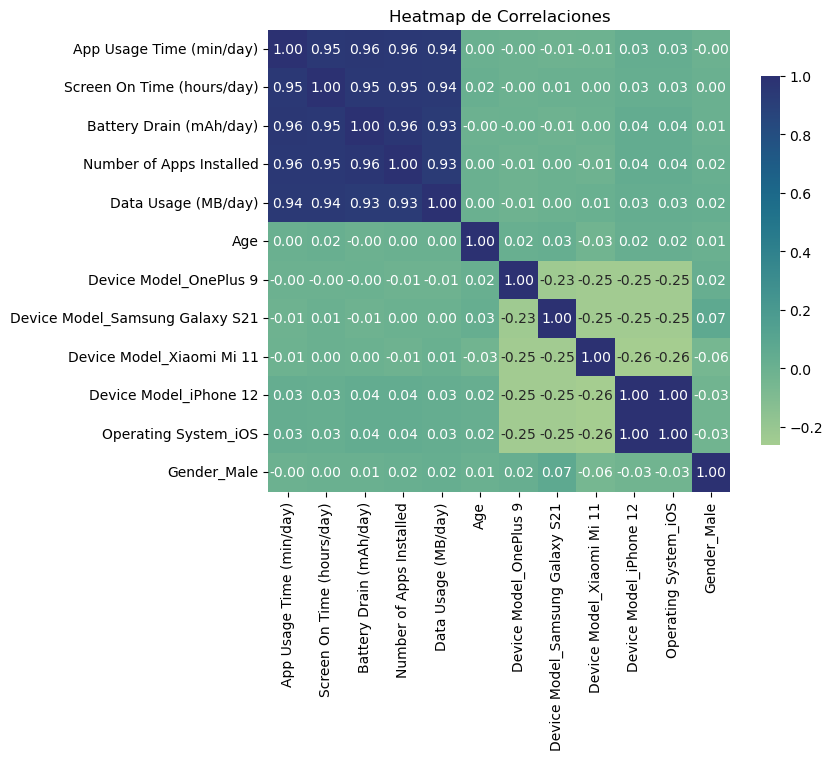

In [32]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='crest', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlaciones')
plt.show()

Comentario: como muestran las visualizaciones las primeras 4 variables **['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']** son las que mas influyen en **'App Usage Time (min/day)'**. Esto lo podemos deducir gracias al 'heatmap' que muestra una correlacion de varianza superior en estas categorias mientras que los que los 'scatterplots' muestran una tendencia lineal y discretizada al comparar estos datos con la variable objetivo. Mientras que en las variables categoricas o binarias **['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
            'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12']** y la variable **'Age'**. La correlacion de la varianza con la variable objetivo es casi nula. Y en el 'scatterplot' se muestra una distribución bastante homogenea lo que no implica ninguna tendencia.

*__Comentario sobre las consideraciones de la limitación del modelo para la regresión lineal:__*
Como lo indica el comentario anterior solo las variables de naturaleza flotante se prospectan como predictoras para una regresion lineal. Por lo que las entradas del modelo seran estas 4 variables. _['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']._ Lo que queremos modelar o lo que personalmente siento que serviria en este caso de estudio modelar seria el uso de minutos en las aplicaciones basado en la edad del individuo o usuario de tal manera que p(X = 'Age') = App Usage Time (min/day). Para intentar modelar el uso de minutos en las apps por persona a partir de la edad que tienen. Dentro de las suposiciones explicitas del modelo es que mientras mas bateria use, mas horas pases en pantalla, y mas datos uses. Mas tiempo en apps, usaras. Y viceversa. Mientras que implicitamente no sabemos si siquiera se ba a poder modelar lo que tenemos supesto de p(age) = app time entonces eso tambien sera una prueba si este modelo es posible con los datos que tenemos. 


*__Comentario sobre las consideraciones de la limitacion del modelo para la regresión logistica:__*
Las entradas seran todas las columnas activas que tenemos mientras que la salida sera una clasificacion de cada tipo de usuario por edad y dispositivo en este caso se esperan que sean en categorias de edad para cada 10 años para cada marca de dispositivo entonces serian(4 rangos de edad x 4 marcas de equipos) 16 categorias. y esperamos podamos hacer una regresion logistica que modele este comportamiento. 

In [36]:
import pymc as pm
import arviz as az
import numpy as np

In [37]:
# Modelo de regresión

In [38]:
df_regresion = df[continuas].copy()

In [39]:
df_regresion.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,393,6.4,1872,67,1122,40
1,268,4.7,1331,42,944,47
2,154,4.0,761,32,322,42
3,239,4.8,1676,56,871,20
4,187,4.3,1367,58,988,31


In [40]:
df_regresion.to_csv('data/df_regresion.csv', index=False) 

In [41]:
data = pd.DataFrame({
    'app_usage': df_regresion['App Usage Time (min/day)'],
    'screen_time': df_regresion['Screen On Time (hours/day)'],
    'battery_drain': df_regresion['Battery Drain (mAh/day)'],
    'apps_installed': df_regresion['Number of Apps Installed'],
    'data_usage': df_regresion['Data Usage (MB/day)'],
    'age': df_regresion['Age']
})

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X = data.drop('app_usage', axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = data['app_usage'].values

In [45]:
%%time
with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=50)
    alpha = pm.Normal('alpha', mu=np.mean(y), sigma=np.std(y))
    mu = alpha + pm.math.dot(X_scaled, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma, alpha]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7 seconds.


CPU times: user 5.3 s, sys: 1.28 s, total: 6.58 s
Wall time: 10.9 s


In [46]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
            mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   39.752  4.972   30.322   48.837      0.057    0.040    7690.0   
beta[1]   49.520  5.250   39.800   59.343      0.064    0.045    6848.0   
beta[2]   45.995  5.173   36.287   55.575      0.061    0.043    7134.0   
beta[3]   39.316  4.461   30.971   47.794      0.055    0.039    6660.0   
beta[4]   -0.100  1.592   -3.058    2.981      0.017    0.019    9290.0   
alpha    271.133  1.609  268.291  274.298      0.017    0.012    8861.0   
sigma     42.058  1.120   39.887   44.072      0.011    0.008   10195.0   

         ess_tail  r_hat  
beta[0]    5595.0    1.0  
beta[1]    5459.0    1.0  
beta[2]    5656.0    1.0  
beta[3]    5812.0    1.0  
beta[4]    5549.0    1.0  
alpha      5445.0    1.0  
sigma      6289.0    1.0  


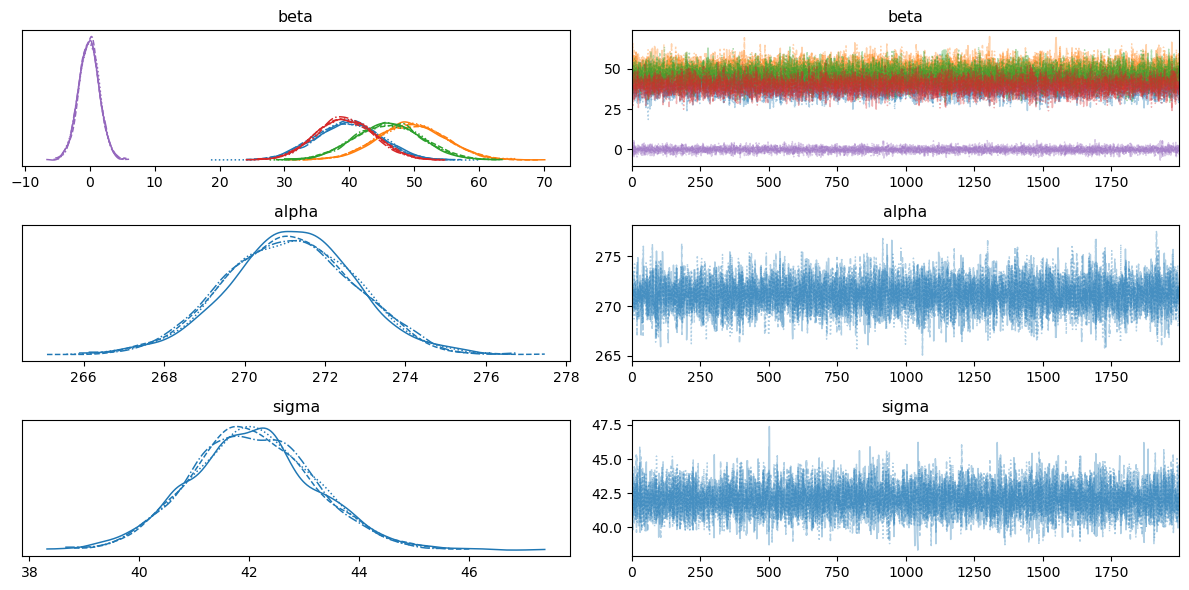

In [47]:
az.plot_trace(trace)
plt.tight_layout()

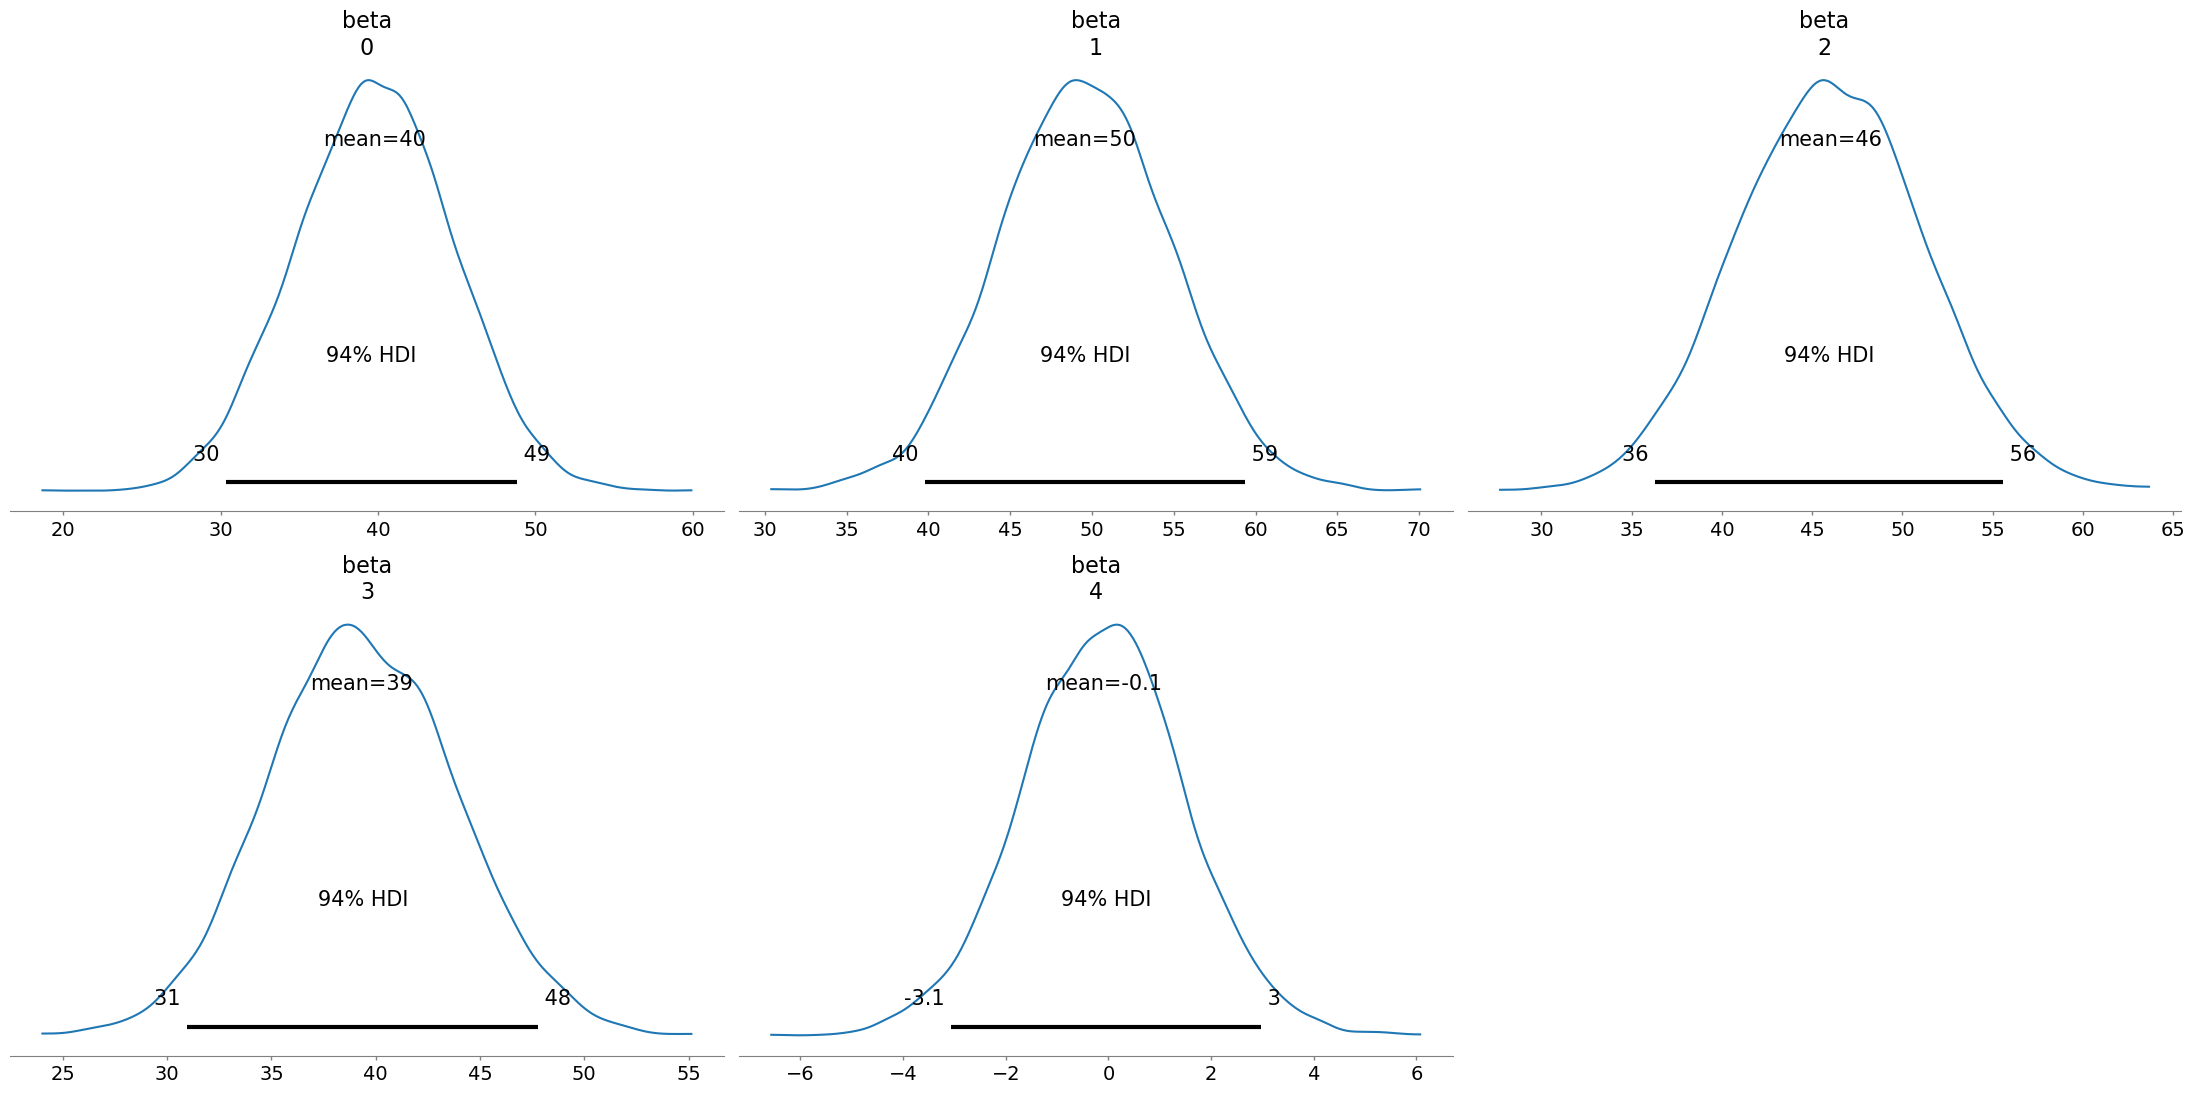

In [48]:
az.plot_posterior(trace, var_names=['beta'])
plt.tight_layout()

In [49]:
alpha_mean = float(trace.posterior['alpha'].mean())  # Convertir a escalar
beta_mean = trace.posterior['beta'].mean(dim=['chain', 'draw']).values  

In [50]:
y_pred = alpha_mean + np.dot(X_scaled, beta_mean)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

In [51]:
print("\nCoeficientes estandarizados (media posterior):")
for var, coef in zip(X.columns, trace.posterior['beta'].mean(axis=(0,1))):
    print(f"{var}: {coef:.3f}")


Coeficientes estandarizados (media posterior):
screen_time: 39.752
battery_drain: 49.520
apps_installed: 45.995
data_usage: 39.316
age: -0.100


In [52]:
print(f"\nR² del modelo: {r2:.3f}")


R² del modelo: 0.944


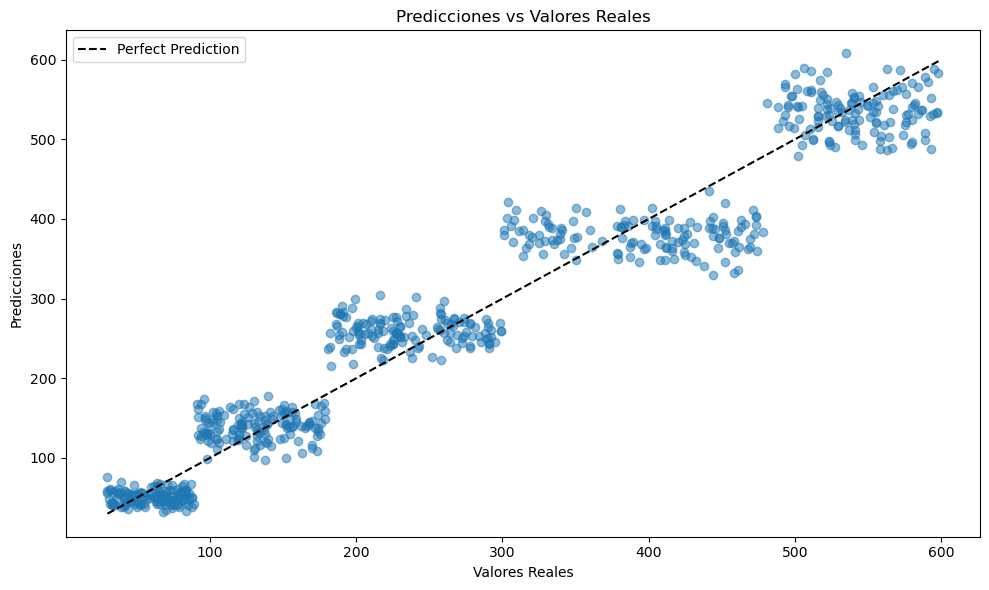

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.tight_layout()

In [54]:
y_pred_samples = np.zeros((len(trace.posterior.chain) * len(trace.posterior.draw), len(y)))

In [55]:
for i, chain in enumerate(trace.posterior.chain):
    for j, draw in enumerate(trace.posterior.draw):
        idx = i * len(trace.posterior.draw) + j
        alpha_sample = float(trace.posterior['alpha'].isel(chain=i, draw=j))
        beta_sample = trace.posterior['beta'].isel(chain=i, draw=j).values
        y_pred_samples[idx] = alpha_sample + np.dot(X_scaled, beta_sample)

In [56]:
pred_mean = y_pred_samples.mean(axis=0)
pred_hdi = az.hdi(y_pred_samples)

/var/folders/hs/3fdn86jj431_qj3x_8075flr0000gn/T/ipykernel_13761/1772480621.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  pred_hdi = az.hdi(y_pred_samples)


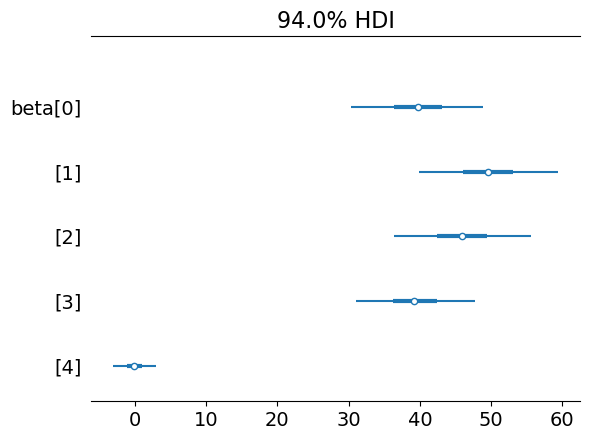

In [57]:
az.plot_forest(trace, var_names=['beta'], combined=True)
plt.tight_layout()

In [58]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
            mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   39.752  4.972   30.322   48.837      0.057    0.040    7690.0   
beta[1]   49.520  5.250   39.800   59.343      0.064    0.045    6848.0   
beta[2]   45.995  5.173   36.287   55.575      0.061    0.043    7134.0   
beta[3]   39.316  4.461   30.971   47.794      0.055    0.039    6660.0   
beta[4]   -0.100  1.592   -3.058    2.981      0.017    0.019    9290.0   
alpha    271.133  1.609  268.291  274.298      0.017    0.012    8861.0   
sigma     42.058  1.120   39.887   44.072      0.011    0.008   10195.0   

         ess_tail  r_hat  
beta[0]    5595.0    1.0  
beta[1]    5459.0    1.0  
beta[2]    5656.0    1.0  
beta[3]    5812.0    1.0  
beta[4]    5549.0    1.0  
alpha      5445.0    1.0  
sigma      6289.0    1.0  


In [59]:
# Modelo de clasificación

In [60]:
df_clasificacion = df.copy()

In [61]:
df_clasificacion.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,393,6.4,1872,67,1122,40,0.0,0.0,0.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,1.0,0.0,0.0,0.0,0.0,0.0
2,154,4.0,761,32,322,42,0.0,0.0,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,0.0,0.0,0.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,0.0,0.0,0.0,1.0,1.0,0.0


In [62]:
df_regresion.to_csv('data/df_clasificacion.csv', index=False) 

In [63]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [64]:
continuous_vars = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Battery Drain (mAh/day)', 'Number of Apps Installed',
                  'Data Usage (MB/day)', 'Age']

binary_vars = ['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
               'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
               'Operating System_iOS', 'Gender_Male']

In [65]:
X_continuous = df_clasificacion[continuous_vars].copy()
X_binary = df_clasificacion[binary_vars].copy()

In [66]:
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_continuous)
X_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_vars)
X = pd.concat([X_continuous_scaled, X_binary], axis=1)

In [67]:
def get_age_category(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50+'

In [68]:
df_clasificacion['age_category'] = df_clasificacion['Age'].apply(get_age_category)
df_clasificacion['category'] = df_clasificacion['age_category'] + '_' + df_clasificacion[['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21', 
                                                                                        'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12']].idxmax(axis=1).str.split('_').str[-1]

In [69]:
le = LabelEncoder()
y = le.fit_transform(df_clasificacion['category'])

In [70]:
n_classes = len(le.classes_)
print(n_classes)

16


In [71]:
%%time
with pm.Model() as model:
    weights = pm.Normal('weights', mu=0, sigma=1, 
                       shape=(X.shape[1], n_classes))
    intercepts = pm.Normal('intercepts', mu=0, sigma=3, 
                          shape=n_classes)
    logits = pm.math.dot(X, weights) + intercepts
    p = pm.Deterministic('p', pm.math.softmax(logits, axis=1))
    y_obs = pm.Categorical('y_obs', p=p, observed=y)
    trace = pm.sample(100, tune=50, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights, intercepts]


Output()

Sampling 4 chains for 50 tune and 100 draw iterations (200 + 400 draws total) took 7 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


CPU times: user 3.77 s, sys: 222 ms, total: 3.99 s
Wall time: 9.99 s


In [72]:
posterior_pred = trace.posterior['p'].mean(dim=['chain', 'draw']).values 
predicted_classes = np.argmax(posterior_pred, axis=1)

In [73]:
confusion = pd.DataFrame(
    data=np.zeros((n_classes, n_classes)),
    index=le.classes_,
    columns=le.classes_
)

In [74]:
for true_idx, pred_idx in zip(y, predicted_classes):
    confusion.iloc[true_idx, pred_idx] += 1

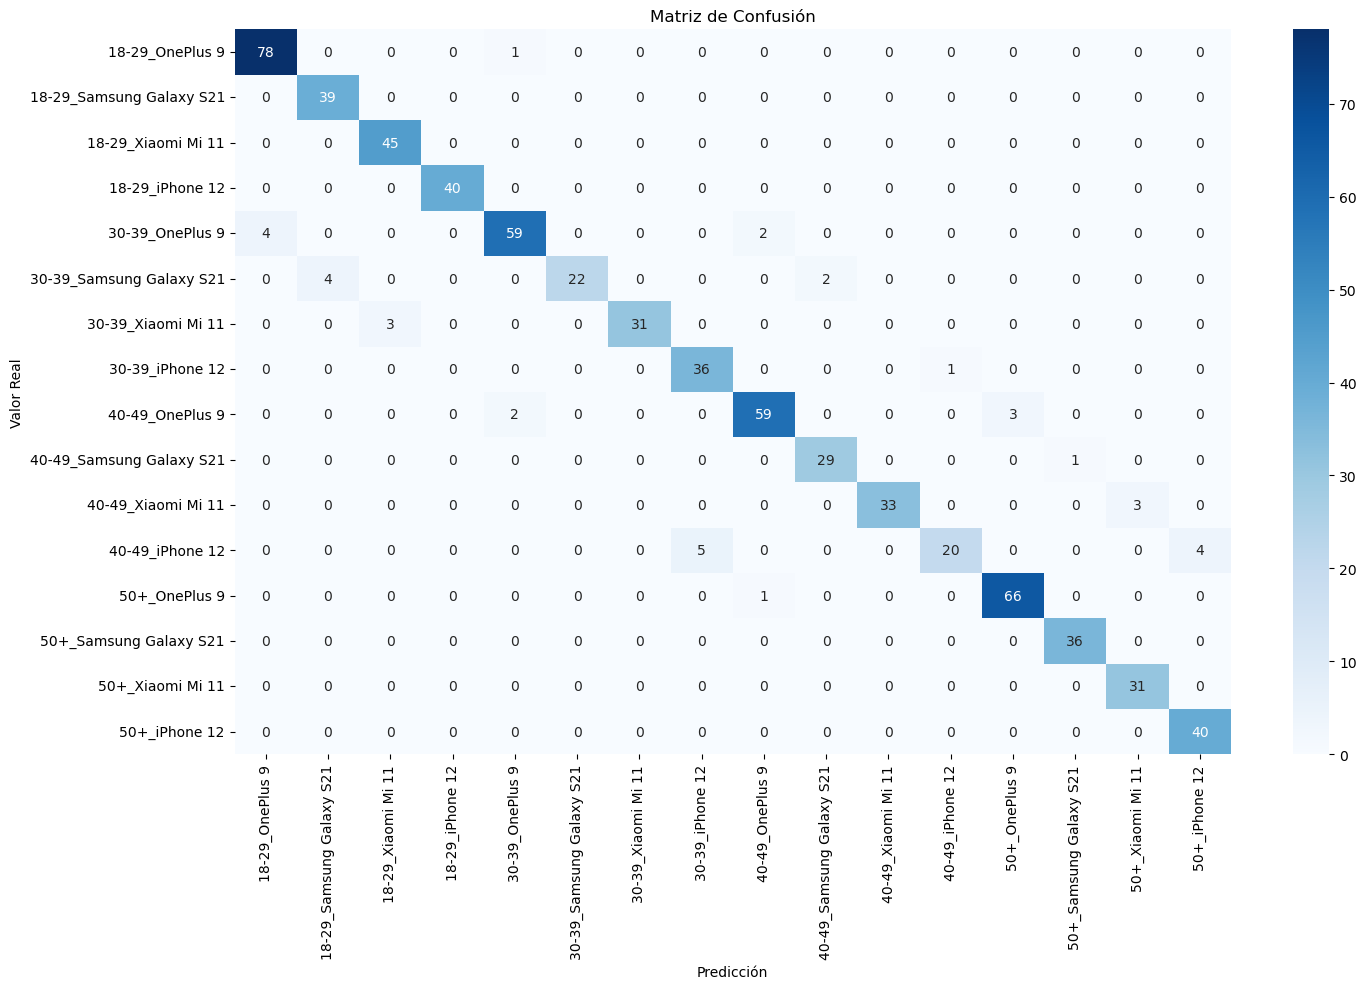

In [75]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()

In [76]:
accuracy = np.mean(predicted_classes == y)
print(f"\nPrecisión global del modelo: {accuracy:.3f}")


Precisión global del modelo: 0.949


In [77]:
for i, class_name in enumerate(le.classes_):
    true_pos = confusion.iloc[i, i]
    total_pred = confusion.iloc[:, i].sum()
    total_actual = confusion.iloc[i, :].sum()
    
    precision = true_pos / total_pred if total_pred > 0 else 0
    recall = true_pos / total_actual if total_actual > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nClase: {class_name}")
    print(f"Precisión: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")


Clase: 18-29_OnePlus 9
Precisión: 0.951
Recall: 0.987
F1-Score: 0.969

Clase: 18-29_Samsung Galaxy S21
Precisión: 0.907
Recall: 1.000
F1-Score: 0.951

Clase: 18-29_Xiaomi Mi 11
Precisión: 0.938
Recall: 1.000
F1-Score: 0.968

Clase: 18-29_iPhone 12
Precisión: 1.000
Recall: 1.000
F1-Score: 1.000

Clase: 30-39_OnePlus 9
Precisión: 0.952
Recall: 0.908
F1-Score: 0.929

Clase: 30-39_Samsung Galaxy S21
Precisión: 1.000
Recall: 0.786
F1-Score: 0.880

Clase: 30-39_Xiaomi Mi 11
Precisión: 1.000
Recall: 0.912
F1-Score: 0.954

Clase: 30-39_iPhone 12
Precisión: 0.878
Recall: 0.973
F1-Score: 0.923

Clase: 40-49_OnePlus 9
Precisión: 0.952
Recall: 0.922
F1-Score: 0.937

Clase: 40-49_Samsung Galaxy S21
Precisión: 0.935
Recall: 0.967
F1-Score: 0.951

Clase: 40-49_Xiaomi Mi 11
Precisión: 1.000
Recall: 0.917
F1-Score: 0.957

Clase: 40-49_iPhone 12
Precisión: 0.952
Recall: 0.690
F1-Score: 0.800

Clase: 50+_OnePlus 9
Precisión: 0.957
Recall: 0.985
F1-Score: 0.971

Clase: 50+_Samsung Galaxy S21
Precisión: 0

In [78]:
coef_means = trace.posterior['weights'].mean(dim=['chain', 'draw']).values
feature_importance = pd.DataFrame(
    coef_means,
    index=X.columns,
    columns=[f'Clase_{i}' for i in range(n_classes)]
)

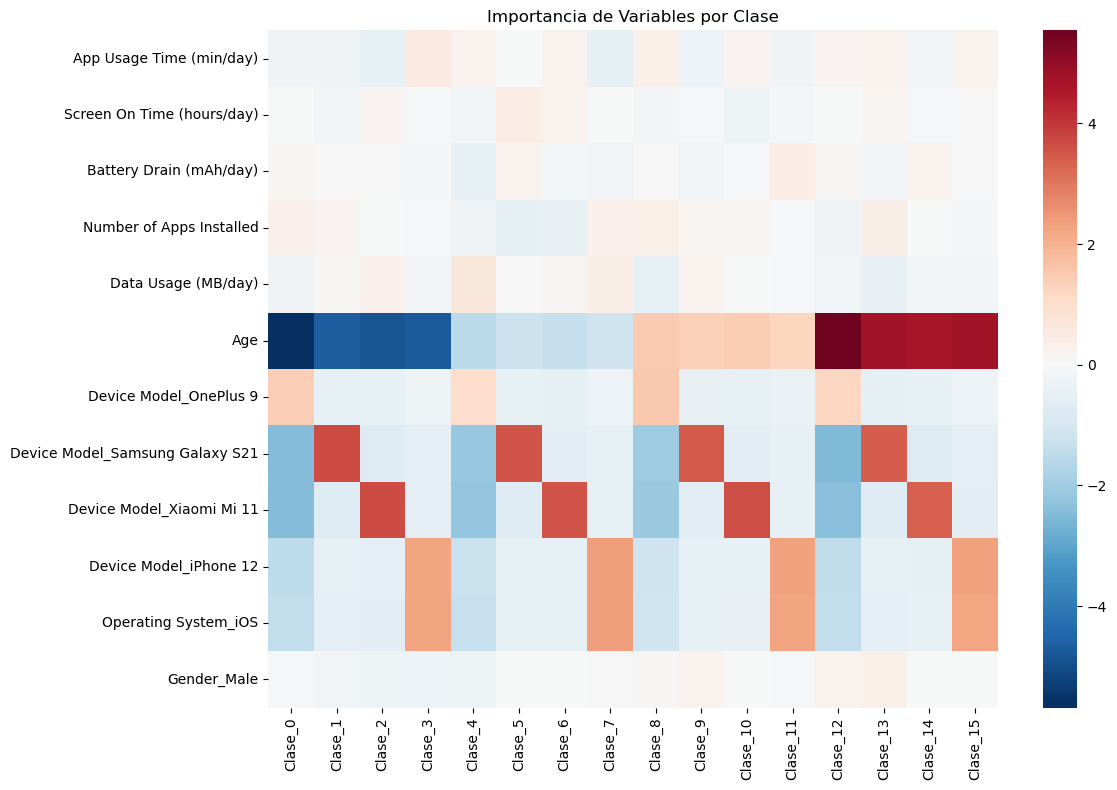

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance, cmap='RdBu_r', center=0)
plt.title('Importancia de Variables por Clase')
plt.tight_layout()

/opt/anaconda3/lib/python3.10/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (11408) in plot_posterior, generating only 40 plots
  warnings.warn(


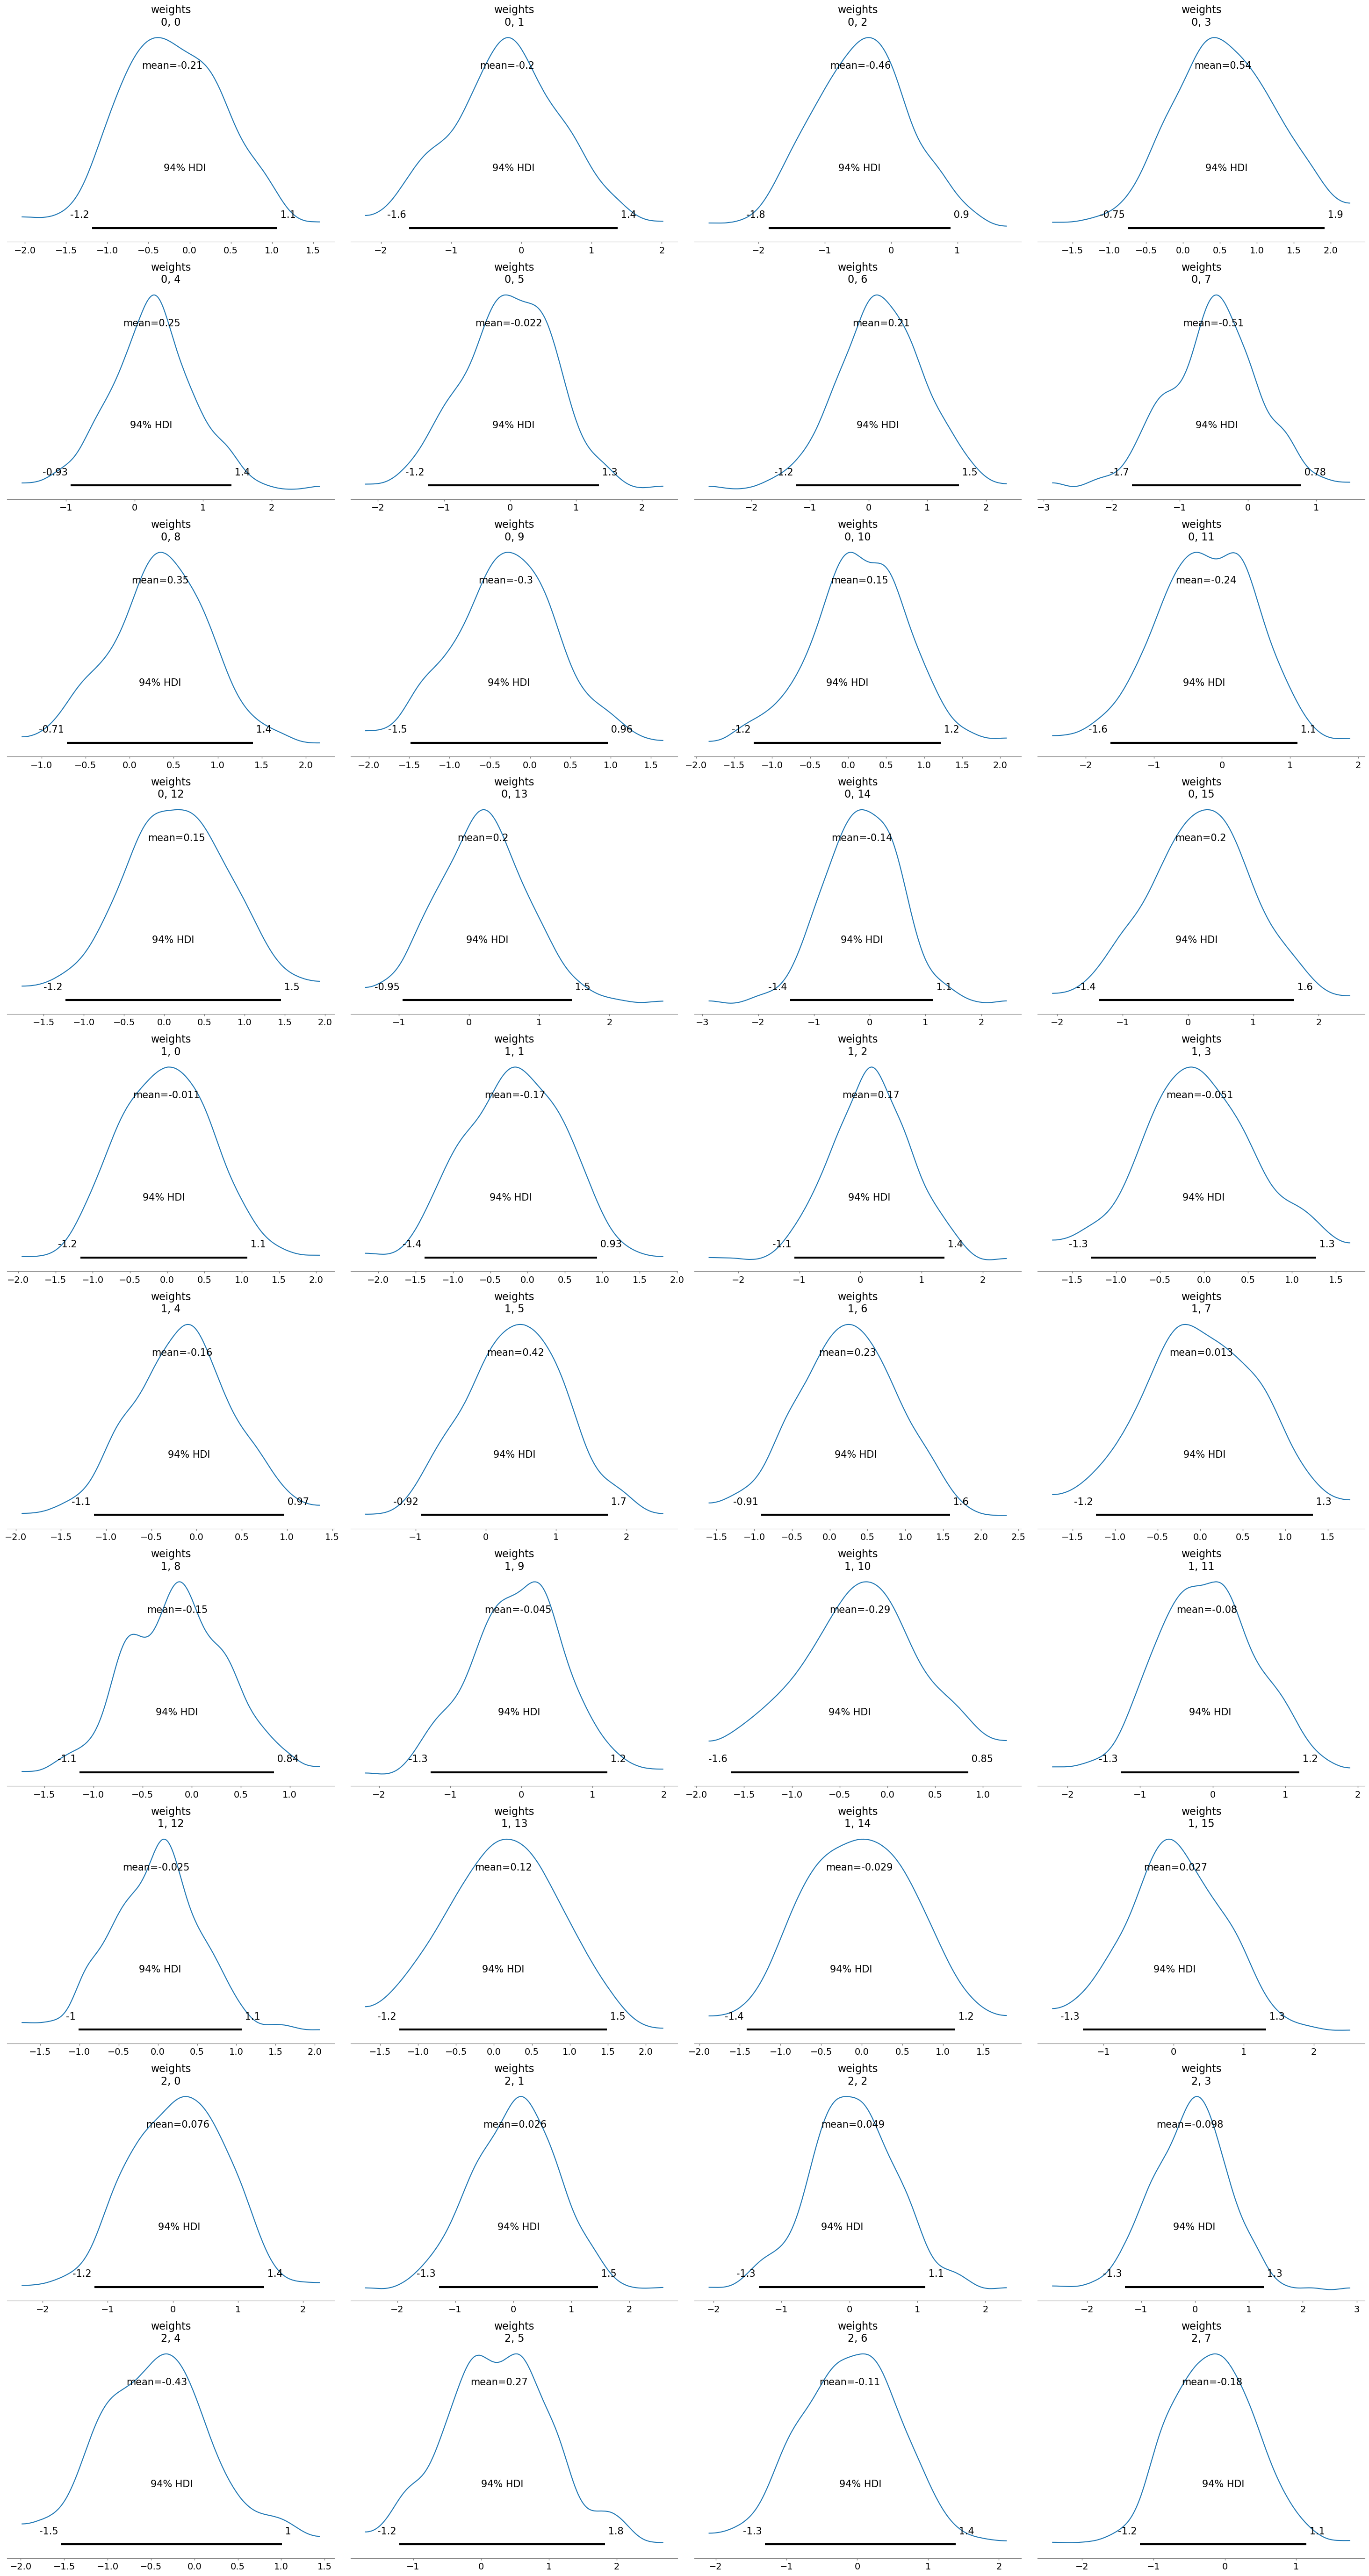

In [89]:
#az.plot_trace(trace)
az.plot_posterior(trace)
plt.tight_layout()

In [81]:
hdi_data = az.hdi(trace, var_names=['weights']).weights.values

In [83]:
results = []
n_classes = 2  

for i, feature in enumerate(X.columns):
    row = {'Variable': feature}
    # Obtener el valor medio del coeficiente
    mean = trace.posterior['weights'].mean(dim=['chain', 'draw']).values[i]
    
    for class_idx in range(n_classes):
        hdi_low = float(hdi_data[0, i, class_idx])
        hdi_high = float(hdi_data[1, i, class_idx])
        
        row[f'HDI_Clase_{class_idx}'] = f"[{hdi_low:.3f}, {hdi_high:.3f}]"
    
    results.append(row)

In [85]:
df_results = pd.DataFrame(results)
cols = ['Variable'] + [col for col in df_results.columns if col != 'Variable']
df_results = df_results[cols]
df_results

,Variable,HDI_Clase_0,HDI_Clase_1
0,App Usage Time (min/day),"[-1.184, -1.167]","[1.064, 1.077]"
1,Screen On Time (hours/day),"[-1.595, -1.379]","[1.374, 0.928]"
2,Battery Drain (mAh/day),"[-1.848, -1.082]","[0.898, 1.374]"
3,Number of Apps Installed,"[-0.746, -1.288]","[1.917, 1.276]"
4,Data Usage (MB/day),"[-0.934, -1.137]","[1.415, 0.971]"
5,Age,"[-1.246, -0.915]","[1.349, 1.733]"
6,Device Model_OnePlus 9,"[-1.235, -0.905]","[1.537, 1.590]"
7,Device Model_Samsung Galaxy S21,"[-1.700, -1.224]","[0.780, 1.326]"
8,Device Model_Xiaomi Mi 11,"[-0.712, -1.143]","[1.402, 0.841]"
9,Device Model_iPhone 12,"[-1.485, -1.273]","[0.963, 1.207]"
